# Libraries Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

# Read the CSV file

In [2]:
user_transactions_raw_df = pd.read_csv('user_transactions.csv',delimiter=',')
user_transactions_raw_df.head(15)

,Transaction ID,User ID,Transaction Date,Transaction Time,Product ID,Product Price,Quantity,Discount Applied,Payment Method,User Age,User Gender,User Location,User Membership Status,Device Used,Referral Source,Transaction Status,User Tenure,Product Category,Amount
0,1,4047,2023-11-26,14:18:07,1029,125.70,1,5,Credit Card,30,Female,Athens,Regular,Desktop,Social Media,Completed,42,Clothing,125.70
1,2,4430,2023-11-25,06:44:25,1050,80.10,2,5,PayPal,25,Male,Athens,Premium,Desktop,Social Media,Completed,16,Electronics,160.20
2,3,3759,2023-09-16,20:43:25,1095,81.40,2,5,Credit Card,42,Male,Patras,Premium,Mobile,Social Media,Completed,12,Books,162.80
3,4,1598,2023-12-21,09:11:03,1000,89.45,2,5,PayPal,39,Female,Thessaloniki,Regular,Mobile,Social Media,Completed,32,Clothing,178.90
4,5,6531,2023-01-23,16:22:27,1019,147.90,3,0,Credit Card,39,Male,Athens,Premium,Desktop,Social Media,Completed,1,Books,443.70
5,6,20355,2023-12-03,23:25:21,1026,134.50,2,20,Credit Card,35,Male,Athens,Premium,Mobile,Social Media,Completed,16,Home & Kitchen,269.00
6,7,8579,2023-02-22,19:23:47,1022,109.30,2,5,Credit Card,27,Male,Athens,Regular,Mobile,Organic,Completed,20,Clothing,218.60
7,8,4114,2023-09-20,07:07:43,1037,129.30,2,5,Credit Card,36,Female,Athens,Regular,Mobile,Referral,Completed,54,Books,258.60
8,9,9775,2023-12-03,10:55:26,1002,135.90,2,15,Credit Card,35,Male,Athens,Regular,Desktop,Social Media,Completed,11,Electronics,271.80
9,10,4903,2023-12-24,06:49:57,1096,71.50,2,5,Credit Card,29,Male,Athens,Regular,Mobile,Social Media,Completed,54,Clothing,143.00


# Data Preprocessing & Exploratory Data Analysis (EDA) &  Pattern and Insight Discovery:

In [3]:
user_transactions_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28342 entries, 0 to 28341
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction ID          28342 non-null  int64  
 1   User ID                 28342 non-null  int64  
 2   Transaction Date        28342 non-null  object 
 3   Transaction Time        28342 non-null  object 
 4   Product ID              28342 non-null  int64  
 5   Product Price           28342 non-null  float64
 6   Quantity                28342 non-null  int64  
 7   Discount Applied        28342 non-null  int64  
 8   Payment Method          28342 non-null  object 
 9   User Age                28342 non-null  int64  
 10  User Gender             28342 non-null  object 
 11  User Location           28341 non-null  object 
 12  User Membership Status  28342 non-null  object 
 13  Device Used             28342 non-null  object 
 14  Referral Source         28342 non-null

In [4]:
user_transactions_raw_df.describe()

,Transaction ID,User ID,Product ID,Product Price,Quantity,Discount Applied,User Age,User Tenure,Amount
count,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000
mean,14171.500000,15215.690495,1049.577341,110.394831,2.278844,11.211982,36.437443,29.941712,251.421518
std,8181.775001,8183.717023,28.842814,29.590948,0.870689,9.265801,10.599580,17.203036,119.914057
min,1.000000,1000.000000,1000.000000,8.400000,1.000000,0.000000,18.000000,1.000000,16.800000
25%,7086.250000,8122.000000,1025.000000,89.100000,2.000000,5.000000,29.000000,15.000000,167.700000
50%,14171.500000,15274.500000,1050.000000,109.200000,2.000000,5.000000,35.000000,30.000000,230.700000
75%,21256.750000,22311.000000,1075.000000,130.700000,3.000000,20.000000,41.000000,45.000000,306.300000
max,28342.000000,29341.000000,1099.000000,226.500000,4.000000,30.000000,69.000000,59.000000,888.800000


In [5]:
missing_values = user_transactions_raw_df.isnull().sum()
columns_with_missing_values = missing_values[missing_values>0]
columns_with_missing_values

User Location    1
dtype: int64

In [6]:
mean_tenure = 29.9
std_tenure = 17.20

def tenure_category(tenure):
    if tenure < mean_tenure:
        return 'Low'
    elif tenure >= mean_tenure and tenure < (mean_tenure + std_tenure):
        return 'Medium'
    else:
        return 'High'

In [7]:
user_transactions_df = user_transactions_raw_df.copy()
user_transactions_df['Transaction DateTime'] = pd.to_datetime(user_transactions_df['Transaction Date'] + ' ' + user_transactions_df['Transaction Time'])
user_transactions_df.drop(['Transaction Date', 'Transaction Time'], axis=1, inplace=True)
user_transactions_df['Year'] = user_transactions_df['Transaction DateTime'].dt.year.astype(int)
user_transactions_df['Month'] = user_transactions_df['Transaction DateTime'].dt.month.astype(int)
user_transactions_df['Day'] = user_transactions_df['Transaction DateTime'].dt.day.astype(int)
user_transactions_df['Hour'] = user_transactions_df['Transaction DateTime'].dt.hour.astype(int)
user_transactions_df['Transaction DateTime'] = pd.to_datetime(user_transactions_df[['Year', 'Month', 'Day', 'Hour']])
bins = [user_transactions_df['User Age'].min(), 30, 40, 50, user_transactions_df['User Age'].max()]
labels = ['min-30', '30-40', '40-50', '50-max']
user_transactions_df['Age_groups'] = pd.cut(user_transactions_df['User Age'], bins=bins, labels=labels, right=False)
user_transactions_df['Tenure_Category'] = user_transactions_df['User Tenure'].apply(tenure_category)

user_transactions_df.head(5)

,Transaction ID,User ID,Product ID,Product Price,Quantity,Discount Applied,Payment Method,User Age,User Gender,User Location,User Membership Status,Device Used,Referral Source,Transaction Status,User Tenure,Product Category,Amount,Transaction DateTime,Year,Month,Day,Hour,Age_groups,Tenure_Category
0,1,4047,1029,125.70,1,5,Credit Card,30,Female,Athens,Regular,Desktop,Social Media,Completed,42,Clothing,125.7,2023-11-26 14:00:00,2023,11,26,14,30-40,Medium
1,2,4430,1050,80.10,2,5,PayPal,25,Male,Athens,Premium,Desktop,Social Media,Completed,16,Electronics,160.2,2023-11-25 06:00:00,2023,11,25,6,min-30,Low
2,3,3759,1095,81.40,2,5,Credit Card,42,Male,Patras,Premium,Mobile,Social Media,Completed,12,Books,162.8,2023-09-16 20:00:00,2023,9,16,20,40-50,Low
3,4,1598,1000,89.45,2,5,PayPal,39,Female,Thessaloniki,Regular,Mobile,Social Media,Completed,32,Clothing,178.9,2023-12-21 09:00:00,2023,12,21,9,30-40,Medium
4,5,6531,1019,147.90,3,0,Credit Card,39,Male,Athens,Premium,Desktop,Social Media,Completed,1,Books,443.7,2023-01-23 16:00:00,2023,1,23,16,30-40,Low


### 1. Distribution of Transaction Amounts

c:\Users\glevantis\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


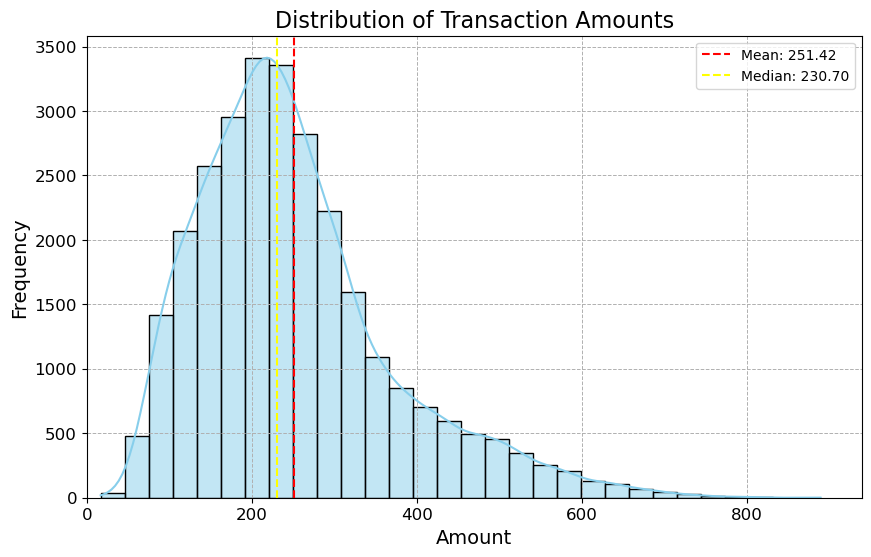

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(user_transactions_df['Amount'], kde=True, color='skyblue', bins=30)

plt.title('Distribution of Transaction Amounts', fontsize=16)
plt.xlabel('Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# mean and median
mean_value = user_transactions_df['Amount'].mean()
median_value = user_transactions_df['Amount'].median()

plt.axvline(mean_value, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='yellow', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

plt.legend()

# Set axis limits and ticks
plt.xlim(0, user_transactions_df['Amount'].max() + 50)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

### 2. User Demographics

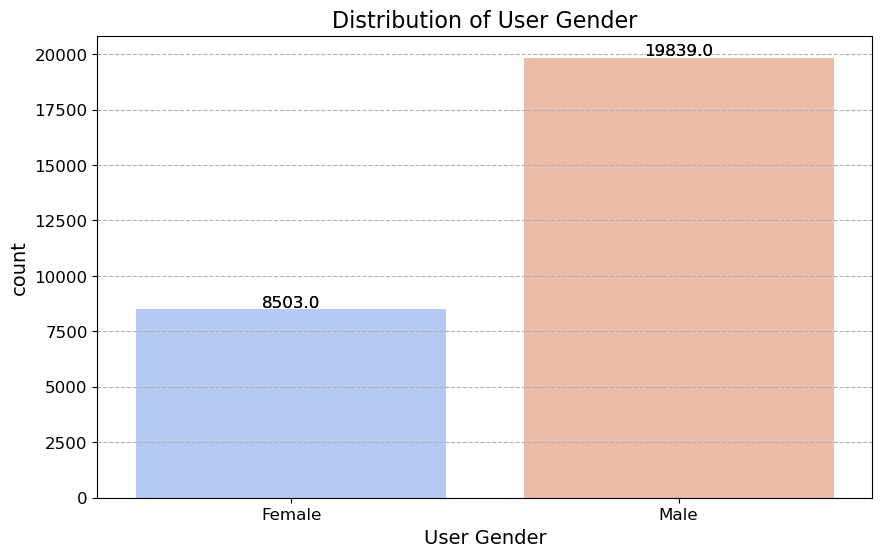

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=user_transactions_df, x='User Gender', palette='coolwarm')

plt.title('Distribution of User Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# grid lines
plt.grid(True, linestyle='--')

# count for each gender
for p in sns.countplot(data=user_transactions_df, x='User Gender', palette='coolwarm').patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 100,
             f'{height}', ha="center", fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

c:\Users\glevantis\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


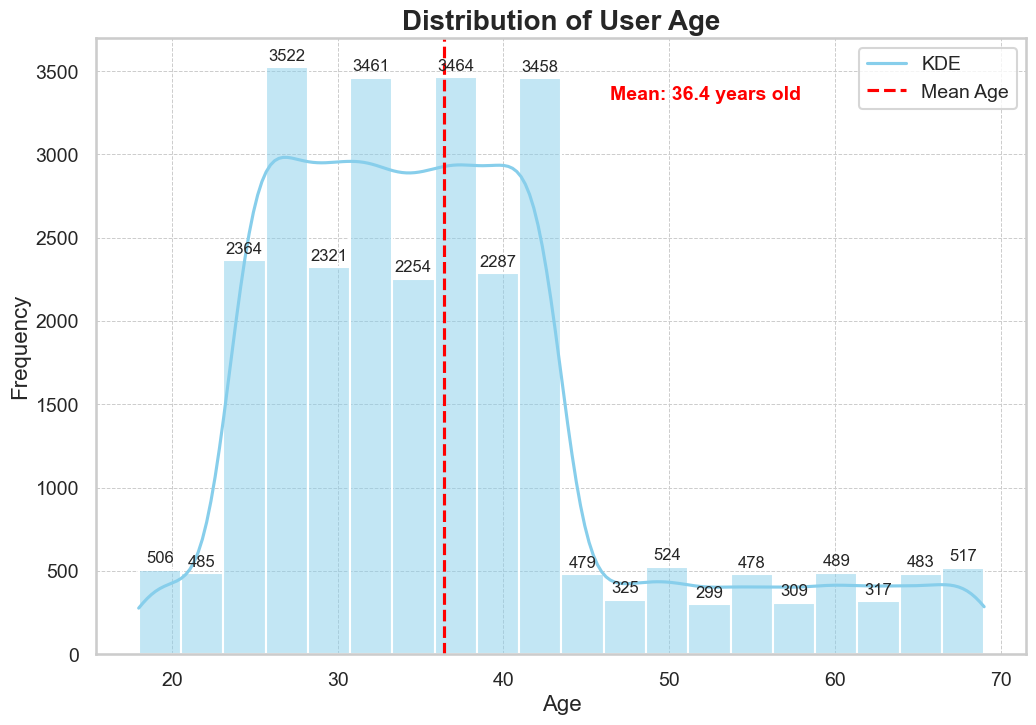

In [29]:

plt.figure(figsize=(12, 8))
sns.histplot(user_transactions_df['User Age'], color='skyblue', kde=True, bins=20)

plt.title('Distribution of User Age', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# vertical line for the mean age
mean_age = user_transactions_df['User Age'].mean()
plt.axvline(mean_age, color='red', linestyle='--')
plt.text(mean_age + 10, plt.gca().get_ylim()[1] * 0.9, f'Mean: {mean_age:.1f} years old', color='red', fontsize=14, fontweight='bold')

# Annotate the histogram bars with their respective heights (count)
for patch in plt.gca().patches:
    height = patch.get_height()
    plt.gca().annotate(f'{height:.0f}', xy=(patch.get_x() + patch.get_width() / 2, height),
                       xytext=(0, 5), textcoords='offset points', ha='center', fontsize=12)


plt.legend(['KDE', 'Mean Age'], fontsize=14)
plt.show()

c:\Users\glevantis\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\glevantis\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


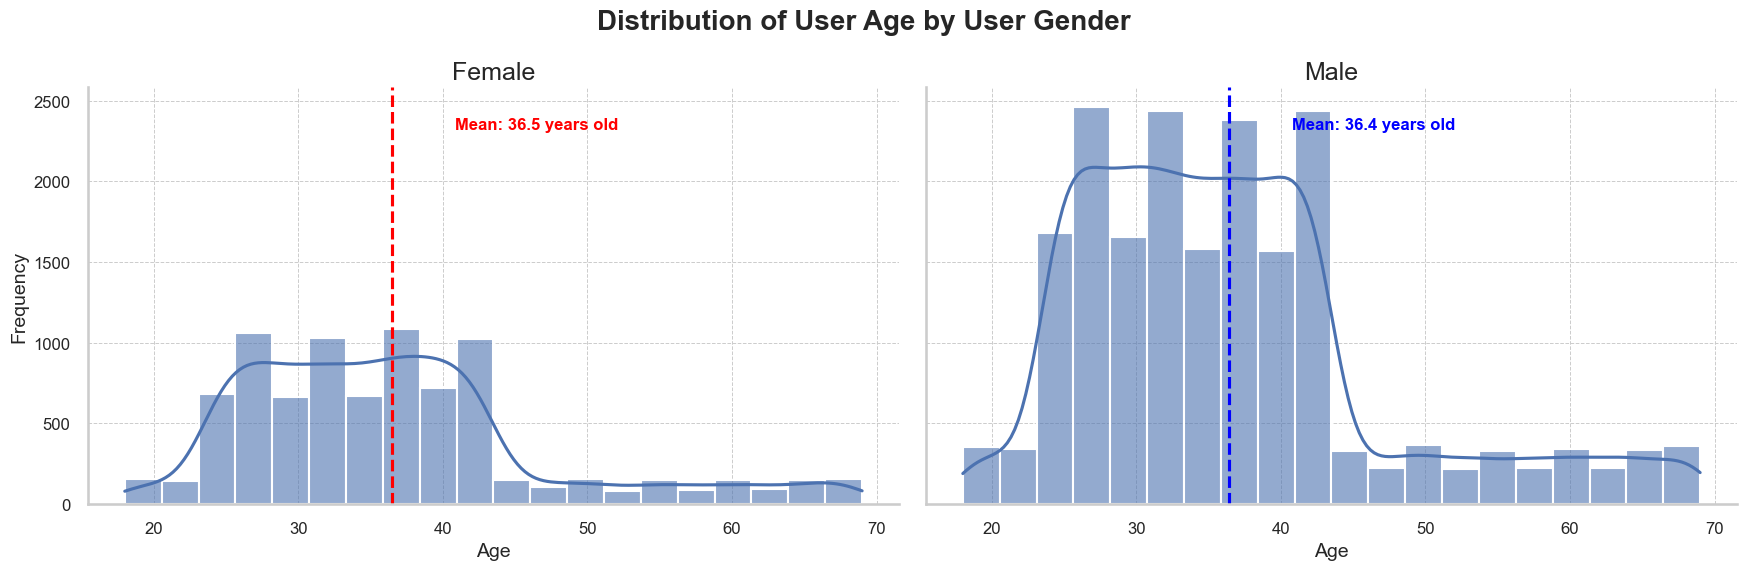

In [30]:
# mean ages per gender
mean_age_female = user_transactions_df[user_transactions_df['User Gender'] == 'Female']['User Age'].mean()
mean_age_male = user_transactions_df[user_transactions_df['User Gender'] == 'Male']['User Age'].mean()

#FacetGrid
g = sns.FacetGrid(user_transactions_df, col='User Gender', palette='coolwarm', height=6, aspect=1.5)
g.map(sns.histplot, 'User Age', kde=True, bins=20, alpha=0.6)

# vertical lines and text annotations for mean ages
for ax, gender in zip(g.axes.flat, g.col_names):
    if gender == 'Female':
        ax.axvline(mean_age_female, color='red', linestyle='--')
        ax.text(mean_age_female + 10, ax.get_ylim()[1] * 0.9, f'Mean: {mean_age_female:.1f} years old', 
                color='red', fontsize=12, fontweight='bold', ha='center')
    else:
        ax.axvline(mean_age_male, color='blue', linestyle='--')
        ax.text(mean_age_male + 10, ax.get_ylim()[1] * 0.9, f'Mean: {mean_age_male:.1f} years old', 
                color='blue', fontsize=12, fontweight='bold', ha='center')


g.set_titles("{col_name}", fontsize=16)
g.set_axis_labels('Age', 'Frequency', fontsize=14)

# grid lines and ticks
for ax in g.axes.flat:
    ax.grid(True, which='both', linestyle='--', linewidth=0.7)
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.subplots_adjust(top=0.85)
g.figure.suptitle('Distribution of User Age by User Gender', fontsize=20, fontweight='bold')
plt.show()


### 3. Purchase Behaviors

#### Distribution of product categories

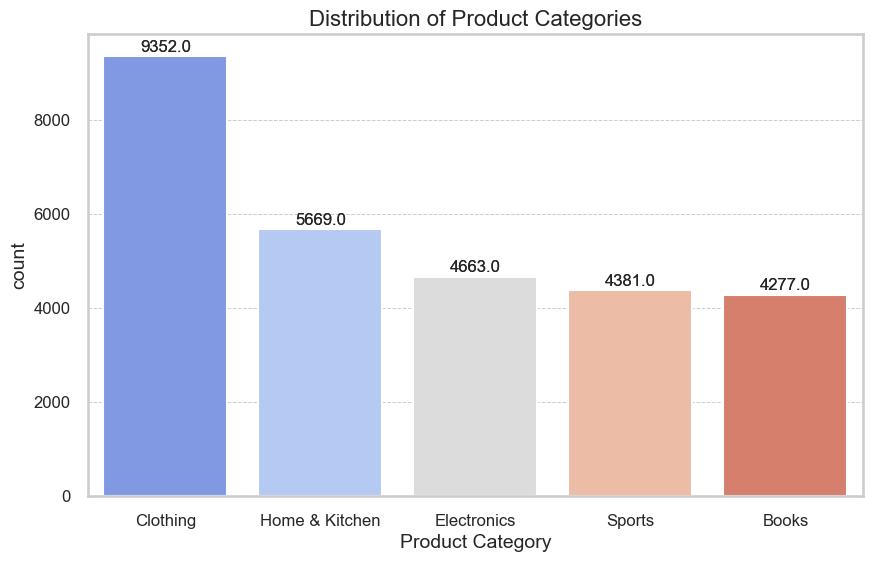

In [31]:
# distribution of product categories
plt.figure(figsize=(10, 6))
sns.countplot(data=user_transactions_df, x='Product Category', palette='coolwarm', order=user_transactions_df['Product Category'].value_counts().index)

plt.title('Distribution of Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

for p in sns.countplot(data=user_transactions_df, x='Product Category', palette='coolwarm', order=user_transactions_df['Product Category'].value_counts().index).patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height +100,
             f'{height}', ha="center", fontsize=12)

# Set tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Average transaction amount by product category

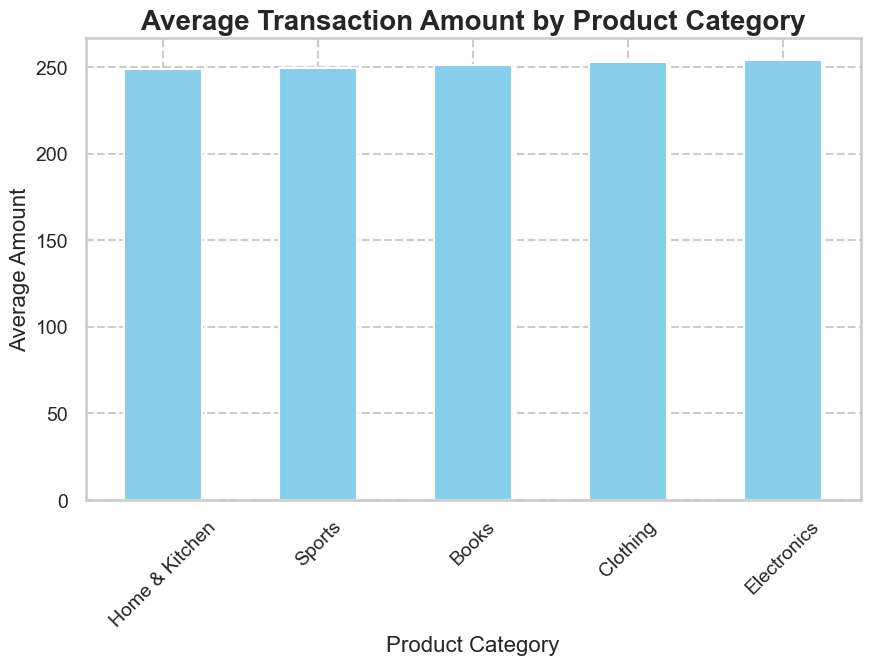

In [33]:

avg_amount_by_category = user_transactions_df.groupby('Product Category')['Amount'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_amount_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Transaction Amount by Product Category', fontsize=20, fontweight='bold')
plt.xlabel('Product Category', fontsize=16)
plt.ylabel('Average Amount', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--')
plt.show()

#### Distribution of payment methods

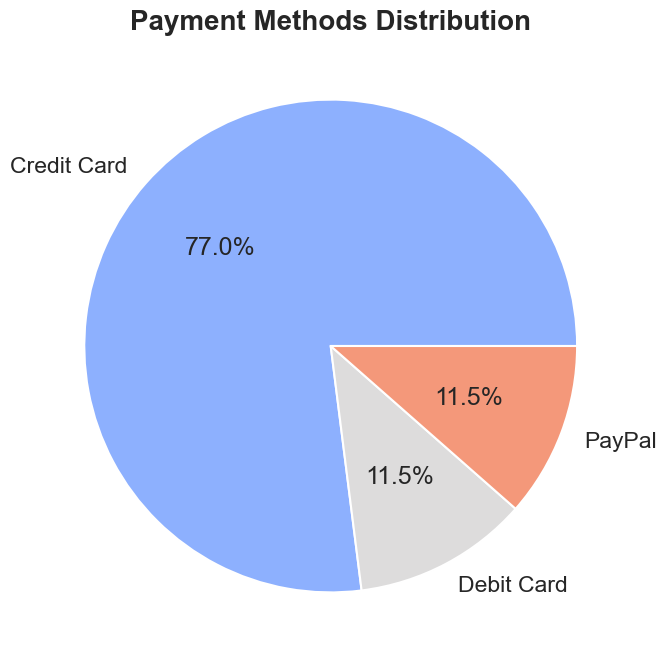

In [34]:
payment_method_counts = user_transactions_df['Payment Method'].value_counts()
plt.figure(figsize=(14, 8))
payment_method_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(payment_method_counts)))
plt.title('Payment Methods Distribution', fontsize=20, fontweight='bold')
plt.ylabel('')
plt.show()

#### Distribution of User Membership

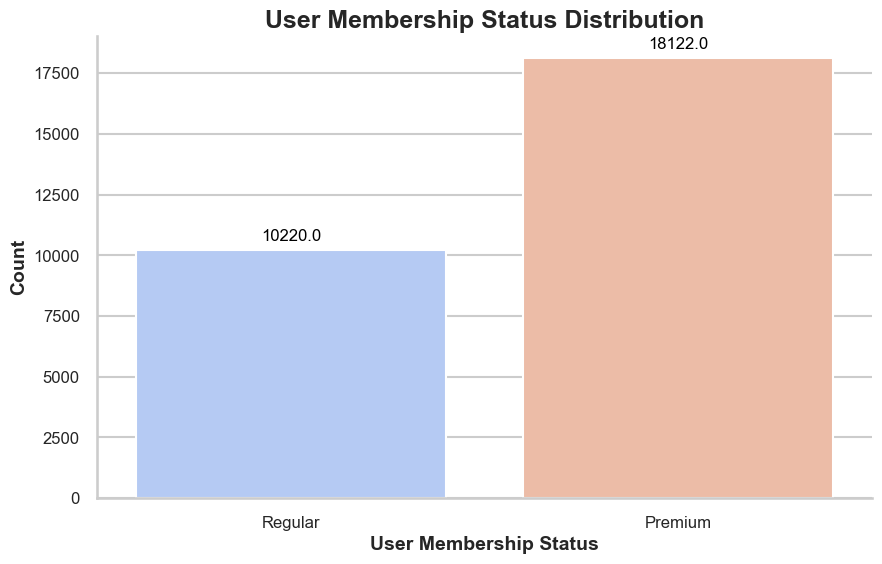

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=user_transactions_df, x='User Membership Status', palette='coolwarm', ax=ax)
ax.set_title('User Membership Status Distribution', fontsize=18, weight='bold')
ax.set_xlabel('User Membership Status', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

ax.yaxis.grid(True)
sns.despine(top=True, right=True)
plt.show()


#### Device Used Distribution

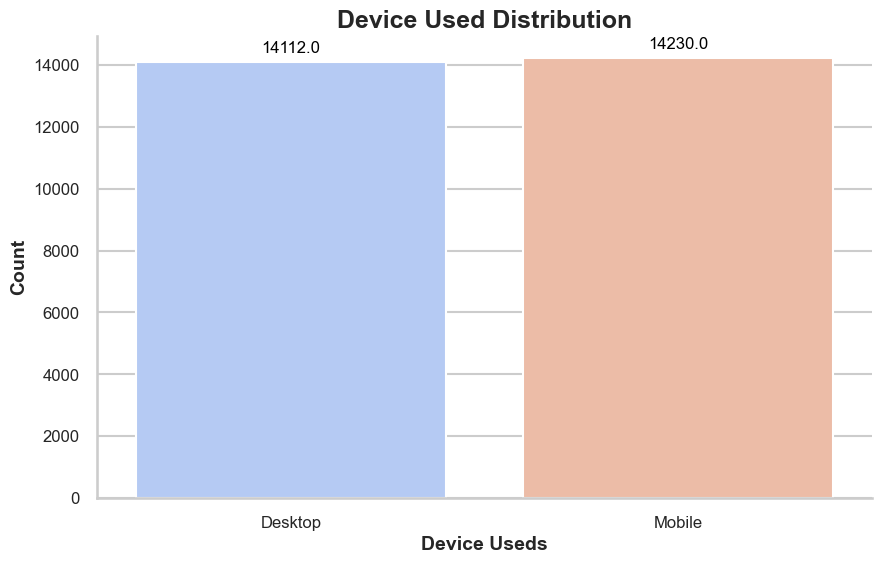

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=user_transactions_df, x='Device Used', palette='coolwarm', ax=ax)
ax.set_title('Device Used Distribution', fontsize=18, weight='bold')
ax.set_xlabel('Device Useds', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

ax.yaxis.grid(True)
sns.despine(top=True, right=True)
plt.show()

#### Referral Source Distribution

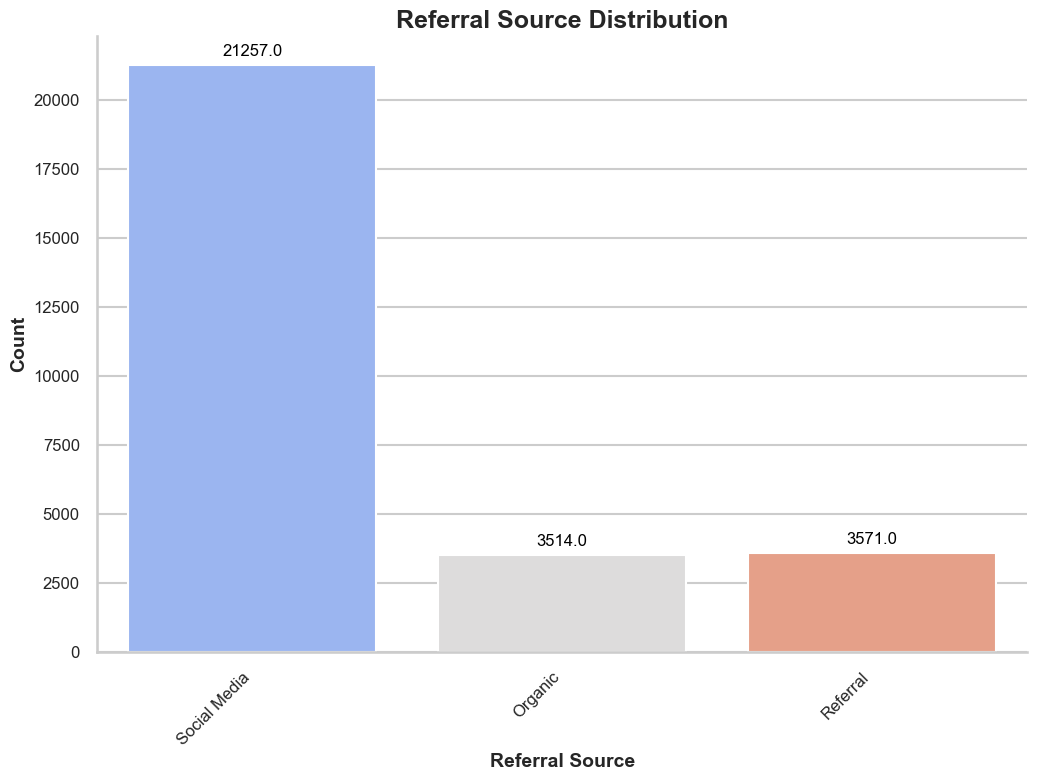

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=user_transactions_df, x='Referral Source', palette='coolwarm', ax=ax)
ax.set_title('Referral Source Distribution', fontsize=18, weight='bold')
ax.set_xlabel('Referral Source', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

ax.yaxis.grid(True)
sns.despine(top=True, right=True)
plt.show()


#### Transaction Status Distribution

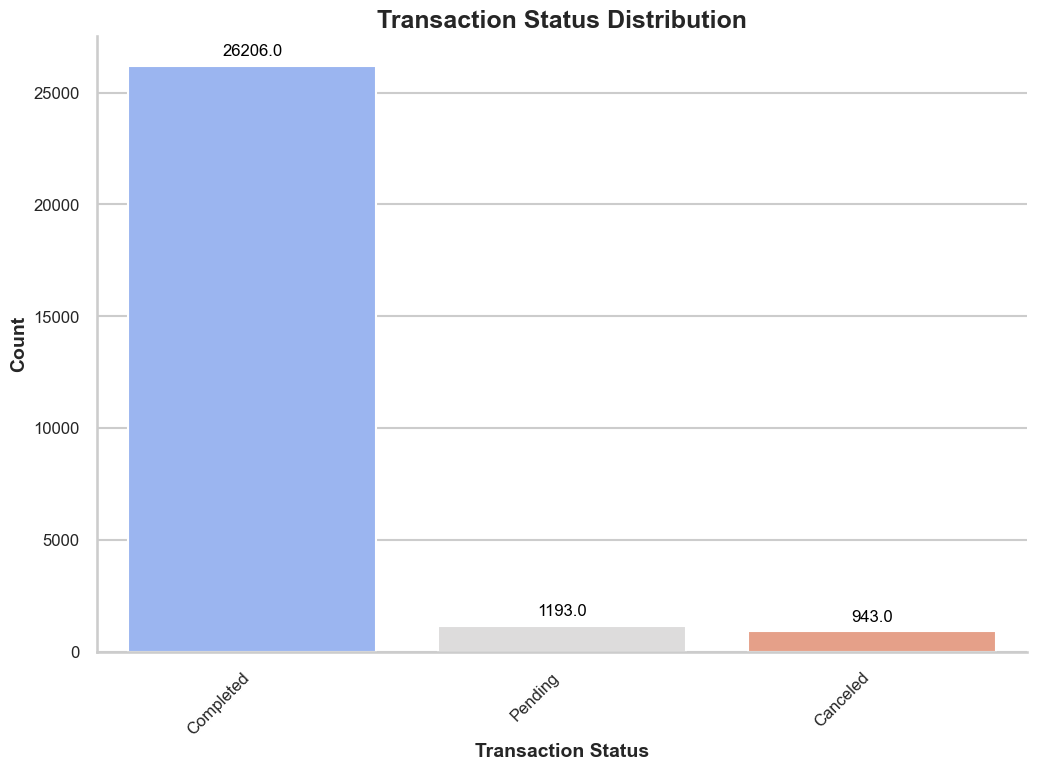

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=user_transactions_df, x='Transaction Status', palette='coolwarm', ax=ax)
ax.set_title('Transaction Status Distribution', fontsize=18, weight='bold')
ax.set_xlabel('Transaction Status', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

ax.yaxis.grid(True)
sns.despine(top=True, right=True)
plt.show()

#### Delayed and Cancelled Transactions per Attribute 1/2

c:\Users\glevantis\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\glevantis\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


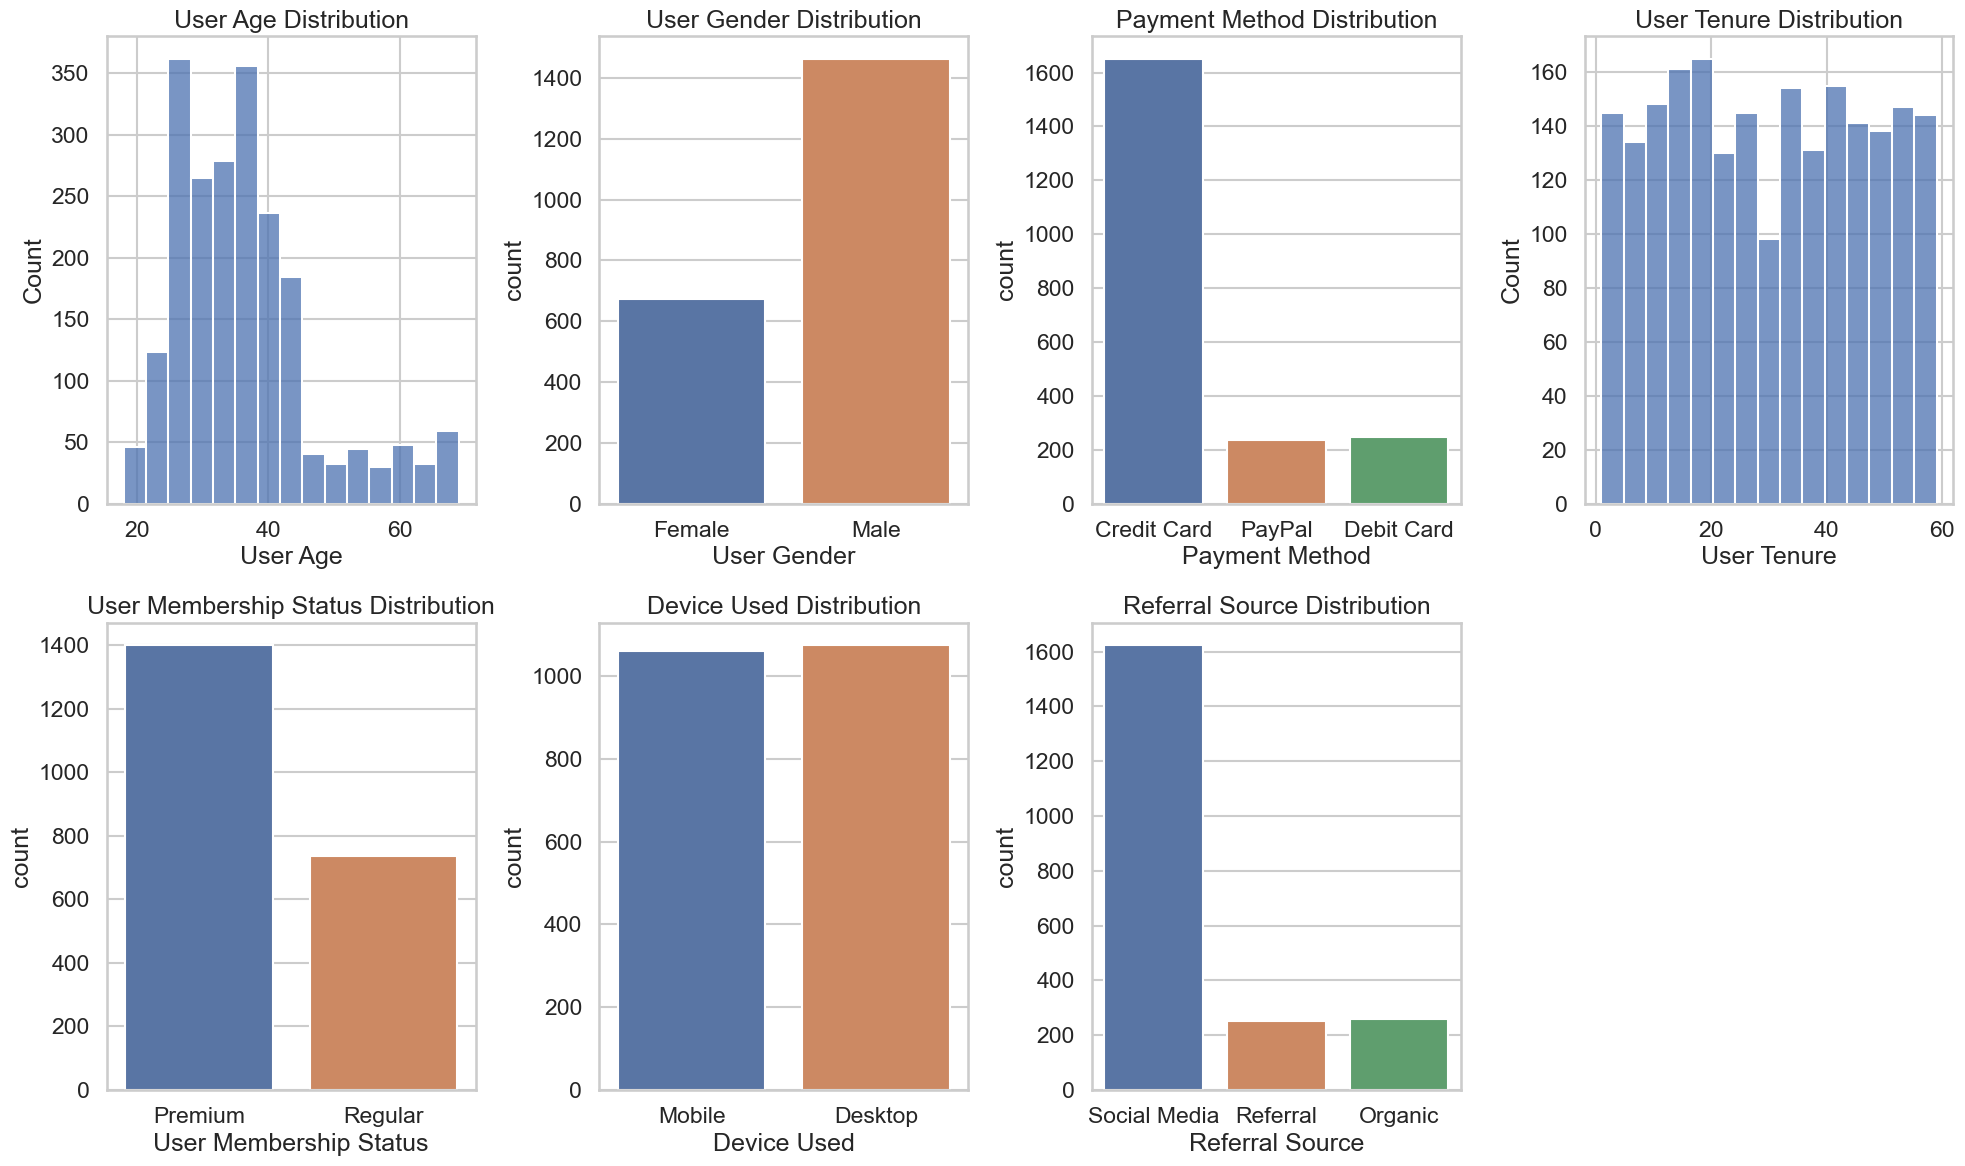

In [19]:
# delayed and cancelled transactions
delayed_cancelled_transactions = user_transactions_df[user_transactions_df['Transaction Status'].isin(['Pending', 'Canceled'])]
fig, axes = plt.subplots(2, 4, figsize=(20, 12))

# By delayed and cancelled transactions:

# User Age Distribution
sns.histplot(ax=axes[0, 0], data=delayed_cancelled_transactions, x='User Age', bins=15)
axes[0, 0].set_title('User Age Distribution')

# User Gender Distribution
sns.countplot(ax=axes[0, 1], data=delayed_cancelled_transactions, x='User Gender')
axes[0, 1].set_title('User Gender Distribution')

# Payment Method Distribution
sns.countplot(ax=axes[0, 2], data=delayed_cancelled_transactions, x='Payment Method')
axes[0, 2].set_title('Payment Method Distribution')

# User Tenure Distribution
sns.histplot(ax=axes[0, 3], data=delayed_cancelled_transactions, x='User Tenure', bins=15)
axes[0, 3].set_title('User Tenure Distribution')

# User Membership Status Distribution
sns.countplot(ax=axes[1, 0], data=delayed_cancelled_transactions, x='User Membership Status')
axes[1, 0].set_title('User Membership Status Distribution')

# Device Used Distribution
sns.countplot(ax=axes[1, 1], data=delayed_cancelled_transactions, x='Device Used')
axes[1, 1].set_title('Device Used Distribution')

# Referral Source Distribution
sns.countplot(ax=axes[1, 2], data=delayed_cancelled_transactions, x='Referral Source')
axes[1, 2].set_title('Referral Source Distribution')


fig.delaxes(axes[1, 3])
plt.tight_layout()
plt.show()





#### Completed Transactions per Attribute 1/2

c:\Users\glevantis\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\glevantis\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


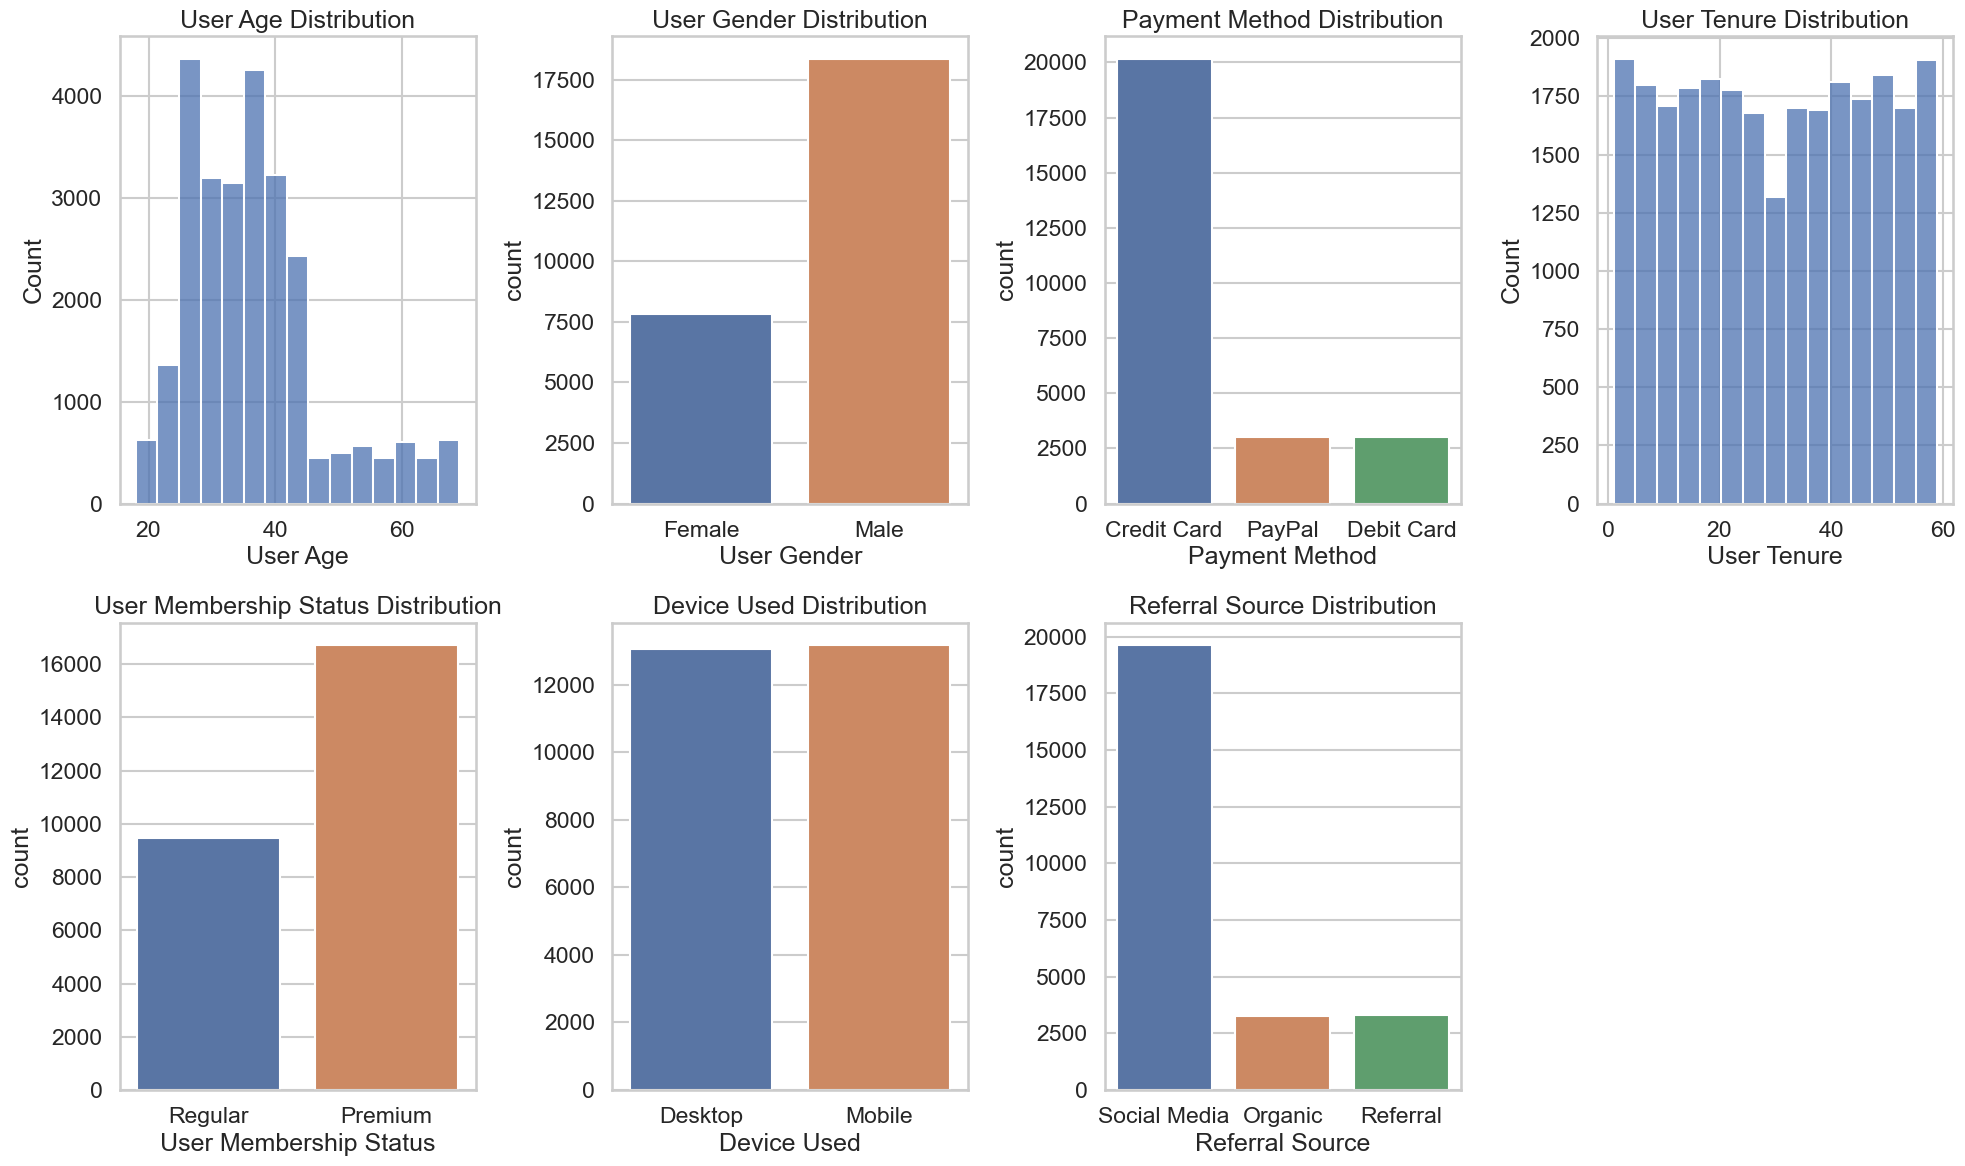

In [20]:
# Completed transactions
completed_transactions = user_transactions_df[user_transactions_df['Transaction Status'].isin(['Completed'])]
fig, axes = plt.subplots(2, 4, figsize=(20, 12))

# User Age Distribution
sns.histplot(ax=axes[0, 0], data=completed_transactions, x='User Age', bins=15)
axes[0, 0].set_title('User Age Distribution')

# User Gender Distribution
sns.countplot(ax=axes[0, 1], data=completed_transactions, x='User Gender')
axes[0, 1].set_title('User Gender Distribution')

# Payment Method Distribution
sns.countplot(ax=axes[0, 2], data=completed_transactions, x='Payment Method')
axes[0, 2].set_title('Payment Method Distribution')

# User Tenure Distribution
sns.histplot(ax=axes[0, 3], data=completed_transactions, x='User Tenure', bins=15)
axes[0, 3].set_title('User Tenure Distribution')

# User Membership Status Distribution
sns.countplot(ax=axes[1, 0], data=completed_transactions, x='User Membership Status')
axes[1, 0].set_title('User Membership Status Distribution')

# Device Used Distribution
sns.countplot(ax=axes[1, 1], data=completed_transactions, x='Device Used')
axes[1, 1].set_title('Device Used Distribution')

# Referral Source Distribution
sns.countplot(ax=axes[1, 2], data=completed_transactions, x='Referral Source')
axes[1, 2].set_title('Referral Source Distribution')


fig.delaxes(axes[1, 3])
plt.tight_layout()
plt.show()

#### Delayed and Cancelled Transactions per Attribute 2/2

c:\Users\glevantis\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


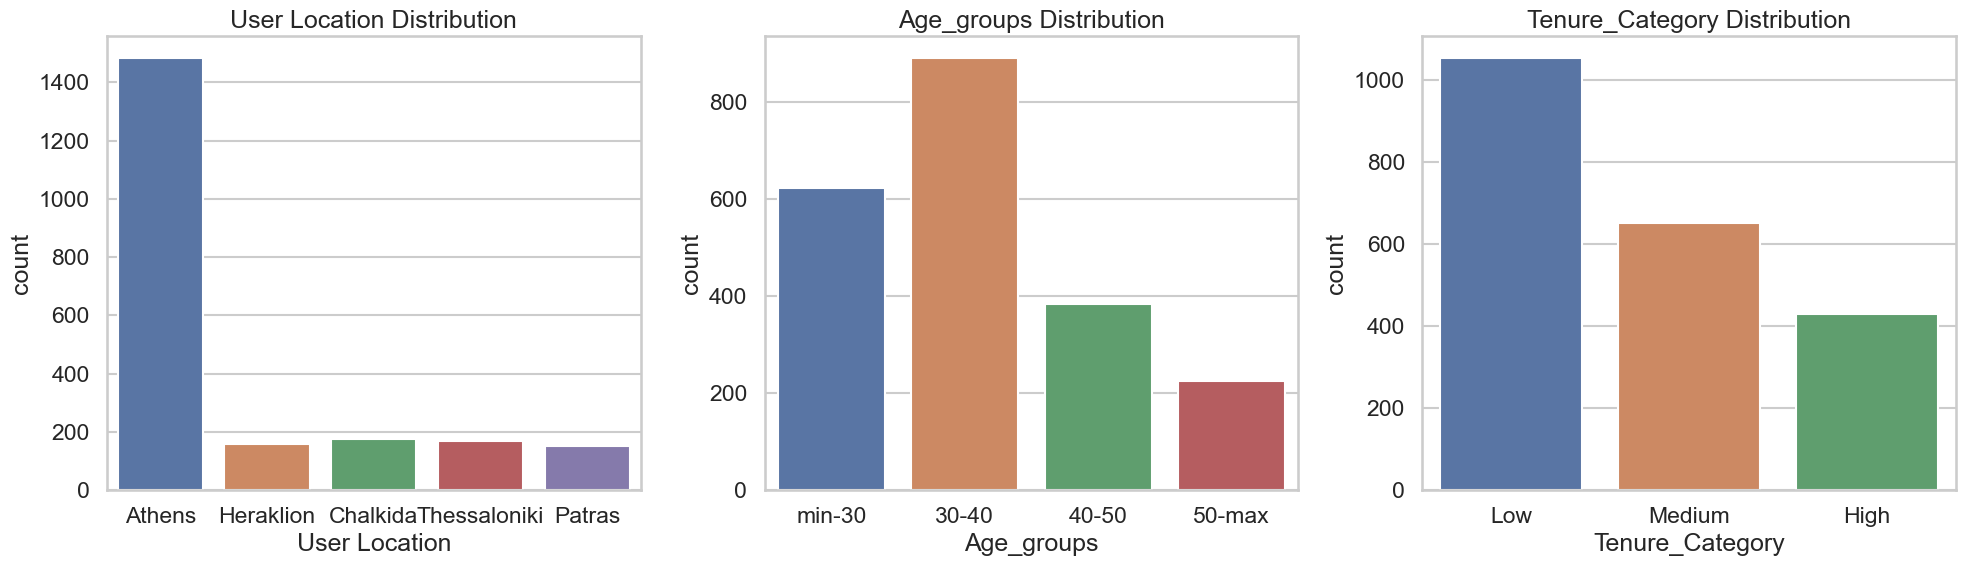

In [22]:

# delayed and cancelled transactions
delayed_cancelled_transactions = user_transactions_df[user_transactions_df['Transaction Status'].isin(['Pending', 'Canceled'])]
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# User Location Distribution
sns.countplot(ax=axes[0], data=delayed_cancelled_transactions, x='User Location')
axes[0].set_title('User Location Distribution')

# Age_over_45 Distribution
sns.countplot(ax=axes[1], data=delayed_cancelled_transactions, x='Age_groups')
axes[1].set_title('Age_groups Distribution')

# Tenure_Category Distribution
sns.countplot(ax=axes[2], data=delayed_cancelled_transactions, x='Tenure_Category')
axes[2].set_title('Tenure_Category Distribution')

plt.tight_layout()
plt.show()



#### Completed Transactions per Attribute 2/2

c:\Users\glevantis\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


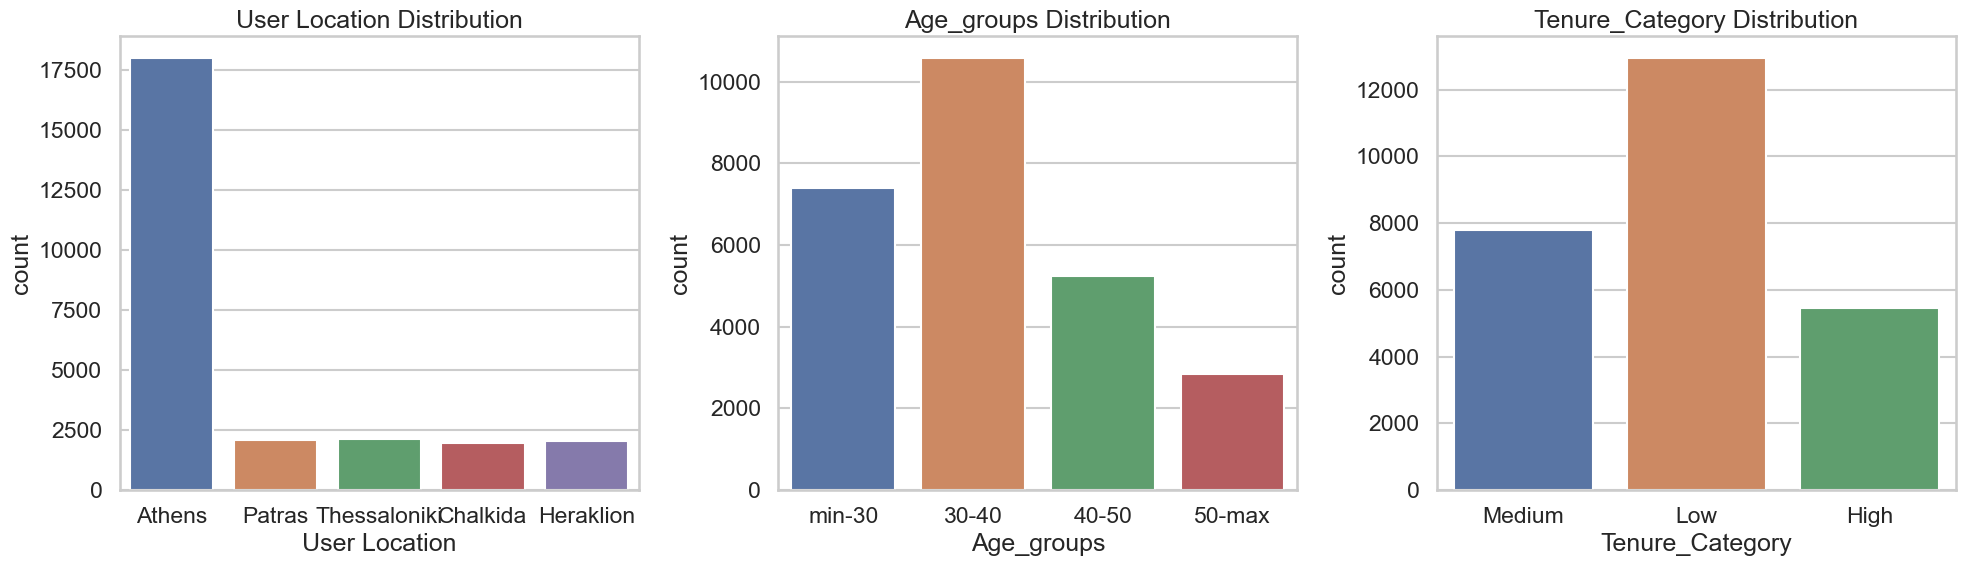

In [23]:
# Completed transactions
completed_transactions = user_transactions_df[user_transactions_df['Transaction Status'].isin(['Completed'])]
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# User Location Distribution
sns.countplot(ax=axes[0], data=completed_transactions, x='User Location')
axes[0].set_title('User Location Distribution')

# Age_over_45 Distribution
sns.countplot(ax=axes[1], data=completed_transactions, x='Age_groups')
axes[1].set_title('Age_groups Distribution')

# Tenure_Category Distribution
sns.countplot(ax=axes[2], data=completed_transactions, x='Tenure_Category')
axes[2].set_title('Tenure_Category Distribution')

plt.tight_layout()
plt.show()

#### Distribution of User Tenure

c:\Users\glevantis\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


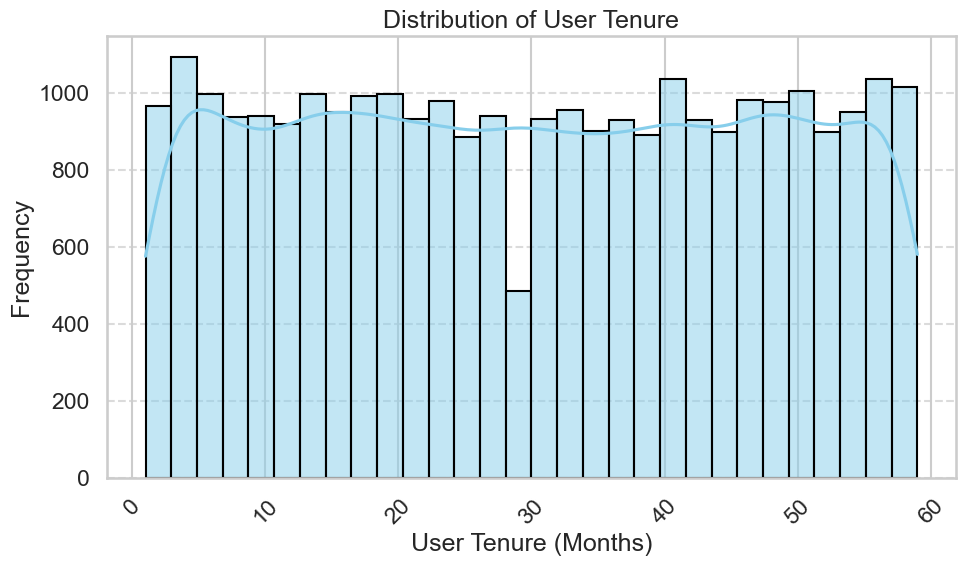

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=user_transactions_df, x='User Tenure', bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of User Tenure')
plt.xlabel('User Tenure (Months)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Distribution of discounts applied for each product category

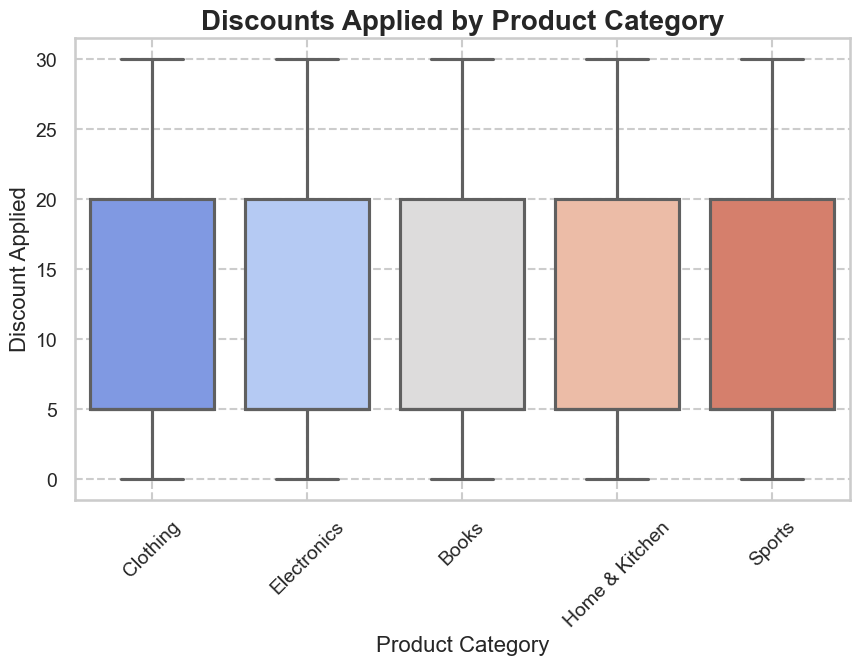

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_transactions_df, x='Product Category', y='Discount Applied', palette='coolwarm')
plt.title('Discounts Applied by Product Category', fontsize=20, fontweight='bold')
plt.xlabel('Product Category', fontsize=16)
plt.ylabel('Discount Applied', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--')
plt.show()


#### Discounts Applied by Gender

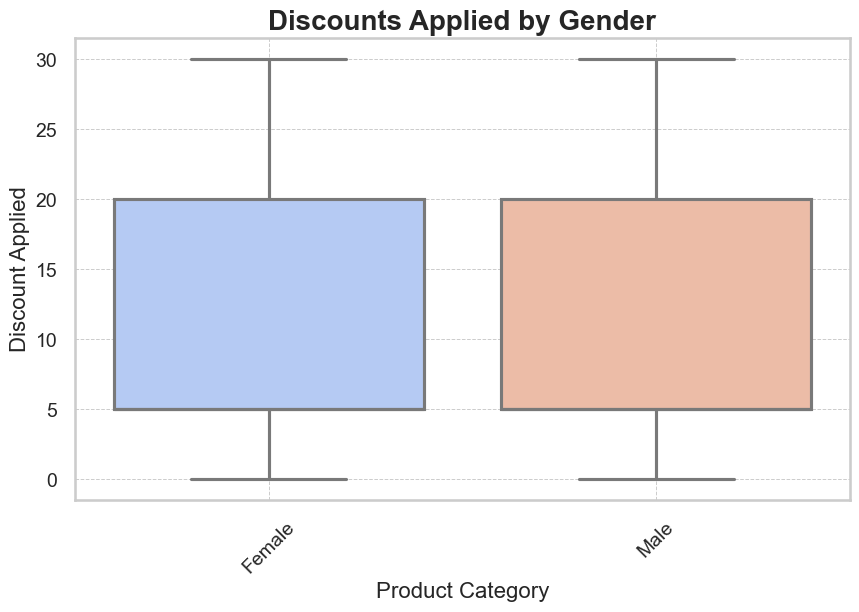

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_transactions_df, x='User Gender', y='Discount Applied', palette='coolwarm')
plt.title('Discounts Applied by Gender', fontsize=20, fontweight='bold')
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Discount Applied', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--')
plt.show()

#### Hourly Purchase Patterns

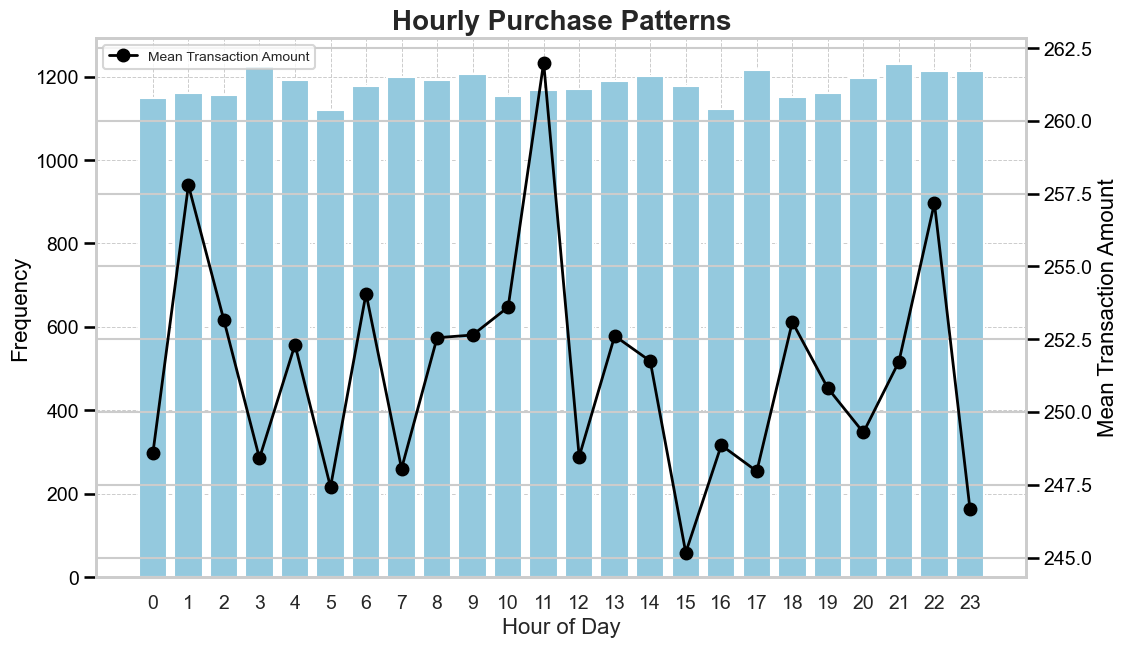

In [27]:
fig, ax1 = plt.subplots(figsize=(12, 7))
sns.countplot(data=user_transactions_df, x='Hour', ax=ax1, color='skyblue')

# mean transaction amount for each hour
mean_transaction_amount = user_transactions_df.groupby('Hour')['Amount'].mean()

# mean transaction amount for each hour (line plot)
ax2 = ax1.twinx()
ax2.plot(mean_transaction_amount.index, mean_transaction_amount.values, color='black', linewidth=2, marker='o')


plt.title('Hourly Purchase Patterns', fontsize=20, fontweight='bold')
ax1.set_xlabel('Hour of Day', fontsize=16)
ax1.set_ylabel('Frequency', fontsize=16, color='black')
ax2.set_ylabel('Mean Transaction Amount', fontsize=16, color='black')
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14, colors='black')
ax2.tick_params(axis='y', labelsize=14, colors='black')
ax1.grid(True, which='both', linestyle='--',)
ax2.legend(['Mean Transaction Amount'], loc='upper left',fontsize=10)
plt.show()
